In [29]:
from skimage.io import imread, imsave, imshow
from skimage import img_as_ubyte
import matplotlib
%matplotlib inline
import os
from os.path import join

import sys
# Add the tf_unet folder path to the sys.path list
sys.path.append('/data3/floraxue/cs282a/SegmentNet/')

import glob
import numpy as np

from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util, my_image_util
from tf_unet.util import *
from PIL import Image
import pickle

In [2]:
%env CUDA_VISIBLE_DEVICES=8
%load_ext autoreload

%autoreload 2

env: CUDA_VISIBLE_DEVICES=8


In [15]:
filelist_x = sorted(glob.glob('/data3/floraxue/cs282a/data/dataset_1/raw_crop_image_100/*.tif'))
filelist_y = sorted(glob.glob('/data3/floraxue/cs282a/data/dataset_1/label_grey_crop_100/B_phase/*.tif'))

i = 13
n = 32
x_test = np.reshape(np.array([np.array(Image.open(fname), dtype=np.float32) for fname in filelist_x[i*n:(i+1)*n]]),
                    [n,256,256,1])
x_test_fnames = filelist_x[i*n:(i+1)*n]
y_test = np.array([np.array(Image.open(fname), dtype=np.bool) for fname in filelist_y[i*n:(i+1)*n]])

# TODO needs to normalize data to 0-1
net = unet.Unet(channels=1, n_class=2, layers=4, features_root=16)# change feature_root to 32 for C_phase
prediction_batch = net.predict("/data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt", x_test)

2019-05-05 06:43:07,802 Layers 4, features 16, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:43:09,542 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:43:09,621 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


In [19]:
path_images = "/data3/floraxue/cs282a/data/dataset_1/trainval/B_phase/"
generator = my_image_util.ImageDataProvider(path_images+"*.tif", shuffle_data=False)
for _ in range(14):
    n_x_test, n_y_test = generator(32)
n_net = unet.Unet(channels=1, n_class=2, layers=4, features_root=16)# change feature_root to 32 for C_phase
n_prediction_batch = n_net.predict("/data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt", n_x_test)

Number of files used: 136900
Number of channels: 1
Number of classes: 2


2019-05-05 06:50:44,894 Layers 4, features 16, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:50:46,639 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:50:46,780 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


In [20]:
total_indices = 2560 **2
slots = []
for i in range(total_indices):
    slots.append([])
print(len(slots))

6553600


In [21]:
filelist_x = sorted(glob.glob('/data3/floraxue/cs282a/data/dataset_1/raw_crop_image_100/*.tif'))
filelist_y = sorted(glob.glob('/data3/floraxue/cs282a/data/dataset_1/label_grey_crop_100/B_phase/*.tif'))

x_test_fnames = [fname for fname in filelist_x if fname.split('/')[-1].split('_')[0] == '0001' ]
y_test_fnames = [fname for fname in filelist_y if fname.split('/')[-1].split('_')[0] == '0001' ]

# x_test = np.reshape(np.array([imread(fname) for fname in x_test_fnames]),[len(x_test_fnames),256,256,1])
# y_test = np.array([imread(fname) for fname in y_test_fnames])
# print(len(x_test_fnames))

In [22]:
net = unet.Unet(channels=1, n_class=2, layers=4, features_root=16)# change feature_root to 32 for C_phase
path_images = "/data3/floraxue/cs282a/data/dataset_1/trainval/B_phase/"
generator = my_image_util.ImageDataProvider(path_images+"*.tif", shuffle_data=False)

batch_size = 32
num_batches = len(x_test_fnames) // batch_size + 1
all_predictions = []
for batch in range(num_batches):
    if batch == num_batches - 1:
        rest = len(x_test_fnames) - batch * batch_size
        x_test_batch, y_test_batch = generator(rest)
    else:
        x_test_batch, y_test_batch = generator(batch_size)
    prediction_batch = net.predict("/data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt", x_test_batch)
    all_predictions.append(prediction_batch.copy())
predictions = np.vstack(all_predictions)
print(predictions.shape)

2019-05-05 06:54:14,815 Layers 4, features 16, filter size 3x3, pool size: 2x2


Number of files used: 136900
Number of channels: 1
Number of classes: 2
INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:19,558 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:19,662 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:21,954 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:22,047 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:24,160 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:24,267 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:26,614 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:26,708 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:28,844 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:28,961 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:31,234 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:31,379 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:33,688 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:33,805 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:35,864 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:35,942 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:37,893 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:37,992 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:40,213 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:40,319 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:42,822 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:42,947 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:45,062 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:45,184 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:47,287 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:47,364 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:49,387 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:49,520 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:54,116 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:54,269 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:54:58,969 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:54:59,109 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:55:03,896 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:55:04,045 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:55:08,814 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:55:08,976 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:55:13,567 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:55:13,691 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:55:18,402 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:55:18,566 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:55:23,036 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:55:23,187 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:55:27,760 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:55:27,907 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:55:32,730 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:55:32,876 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:55:37,936 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:55:38,065 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:55:43,123 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:55:43,276 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:55:47,891 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:55:48,039 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:55:52,815 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:55:52,956 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:55:57,888 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:55:58,092 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:56:02,963 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:56:03,088 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:56:07,778 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:56:07,954 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:56:12,359 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:56:12,493 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:56:17,458 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:56:17,555 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:56:22,484 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:56:22,680 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:56:27,148 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:56:27,331 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:56:31,605 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:56:31,763 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:56:36,433 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:56:36,641 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:56:40,953 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:56:41,060 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:56:45,591 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:56:45,690 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:56:50,229 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:56:50,359 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:56:55,301 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:56:55,479 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:57:00,439 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:57:00,609 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:57:05,343 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:57:05,498 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-05 06:57:09,419 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-05 06:57:09,587 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


(1369, 164, 164, 2)


In [27]:
# print(y_test[28][-1])
# print(n_y_test[28][-1])

# print(prediction_batch[28][-1])
# print(n_prediction_batch[28][-1])
# plt.imshow(x_test[28].reshape((256, 256)), cmap='gray')
# plt.show()
# plt.imshow(n_x_test[28].reshape((256, 256)), cmap='gray')
# plt.show()
mask = np.array(predictions[444, :, -1, 1] > 0.5, dtype=np.int32)
print(mask)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [30]:
pickle.dump(predictions, open('image_0001_prediction_B_phase.p', 'wb'))

In [31]:
padded_crop_len = predictions.shape[1]   # = 164
stride = 64
raw_size = 2560
small_img_size = 256
pad = (small_img_size - padded_crop_len) // 2   # = 46
for fname_idx in range(len(x_test_fnames)):
    fname = x_test_fnames[fname_idx]
    if fname_idx % 100 == 0:
        print("Processing id", fname_idx, "fname", fname)
    tokens = fname.split('/')[-1].split('_')
    row, col = int(tokens[2]), int(tokens[4])
    istart, jstart = row * stride + pad, col * stride + pad
    for delta_i in range(padded_crop_len):
        for delta_j in range(padded_crop_len):
            curr_i, curr_j = istart + delta_i, jstart + delta_j
            slot_idx = curr_i * raw_size + curr_j
            slot_pred = predictions[fname_idx, delta_i, delta_j, 1] > 0.5
            slots[slot_idx].append(slot_pred)

Processing id 0 fname /data3/floraxue/cs282a/data/dataset_1/raw_crop_image_100/0001_row_0_col_0_crop.tif
Processing id 100 fname /data3/floraxue/cs282a/data/dataset_1/raw_crop_image_100/0001_row_11_col_33_crop.tif
Processing id 200 fname /data3/floraxue/cs282a/data/dataset_1/raw_crop_image_100/0001_row_14_col_23_crop.tif
Processing id 300 fname /data3/floraxue/cs282a/data/dataset_1/raw_crop_image_100/0001_row_17_col_13_crop.tif
Processing id 400 fname /data3/floraxue/cs282a/data/dataset_1/raw_crop_image_100/0001_row_19_col_3_crop.tif
Processing id 500 fname /data3/floraxue/cs282a/data/dataset_1/raw_crop_image_100/0001_row_21_col_27_crop.tif
Processing id 600 fname /data3/floraxue/cs282a/data/dataset_1/raw_crop_image_100/0001_row_24_col_17_crop.tif
Processing id 700 fname /data3/floraxue/cs282a/data/dataset_1/raw_crop_image_100/0001_row_26_col_7_crop.tif
Processing id 800 fname /data3/floraxue/cs282a/data/dataset_1/raw_crop_image_100/0001_row_29_col_30_crop.tif
Processing id 900 fname /

In [32]:
stitched_img = np.zeros((raw_size, raw_size))
for i in range(len(slots)):
    curr_slot = np.array(slots[i])
    row, col = i // raw_size, i % raw_size
    if row % 200 == 0 and col == 0:
        print("Processing row", row)
    if len(curr_slot) == 0:
        voted = 0
    else:
        voted = int(np.sum(curr_slot) > (len(curr_slot) / 2))
    stitched_img[row, col] = voted

Processing row 0
Processing row 200
Processing row 400
Processing row 600
Processing row 800
Processing row 1000
Processing row 1200
Processing row 1400
Processing row 1600
Processing row 1800
Processing row 2000
Processing row 2200
Processing row 2400


251150


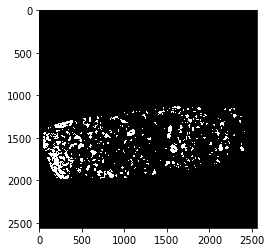

In [33]:
print(len(stitched_img[stitched_img == 1]))
import matplotlib.pyplot as plt
plt.imshow(stitched_img, cmap='gray')

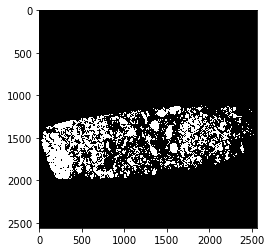

In [34]:
original = plt.imread('/data3/floraxue/cs282a/data/dataset_1/label_grey_100/B_phase/0001_mask.tif')
plt.imshow(original, cmap='gray')

In [35]:
pickle.dump(stitched_img, open('image_0001_prediction_B_phase_stitch.p', 'wb'))
plt.imsave('image_0001_prediction_B_phase_stitched.tif', stitched_img, cmap='gray')

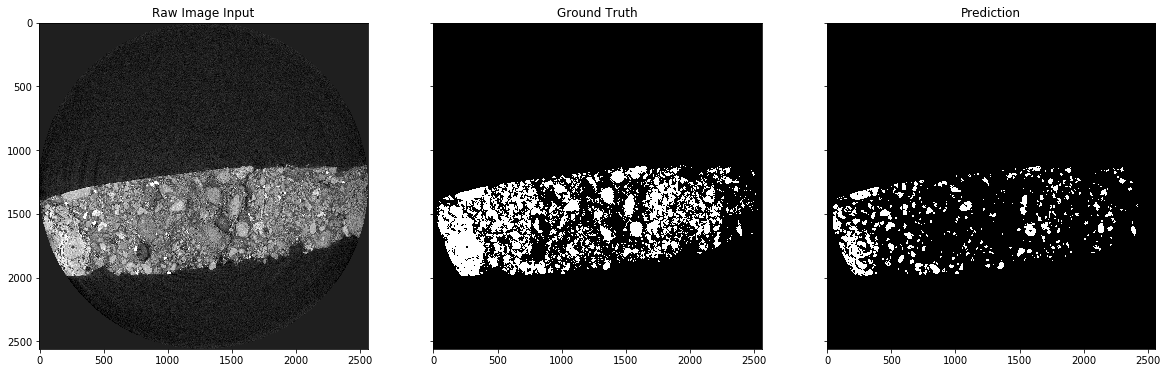

In [38]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(20,6))
inp = plt.imread('/data3/floraxue/cs282a/data/dataset_1/raw_image_100/0001.tif')
ground_truth = plt.imread('/data3/floraxue/cs282a/data/dataset_1/label_grey_100/B_phase/0001_mask.tif')

ax[0].imshow(inp,aspect="auto", cmap='gray')
ax[0].set_title('Raw Image Input')
ax[1].imshow(ground_truth, cmap='gray', aspect="auto")
ax[1].set_title('Ground Truth')
ax[2].imshow(stitched_img, cmap='gray', aspect="auto")
ax[2].set_title('Prediction')
plt.savefig('image_0001_B_phase_result.tif')